# K Nearest Neighbors 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the datset
df = pd.read_csv("C://Users//arjun//diabetes.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#checking any missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#checking datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
#Define the dependent and independent varialbes
X=df.iloc[:,[0,7]].values
y=df.iloc[:,8].values
#X=df.drop(['Outcome'],axis=1)
#y=df[['Outcome']]

In [7]:
#applying Standardization to the variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)


In [8]:
#Splitting the data into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

###### Applying KNN Classifier

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [12]:
#checking confusion matrix and accracy
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[100,  57],
       [ 46,  28]], dtype=int64)

In [13]:
print('Accuracy with default parameters : ',accuracy_score(y_test,y_pred))

Accuracy with default parameters :  0.5541125541125541


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       157
           1       0.33      0.38      0.35        74

    accuracy                           0.55       231
   macro avg       0.51      0.51      0.51       231
weighted avg       0.57      0.55      0.56       231



# Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [15]:
error_rate=[]

#first we will take some range of 50
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

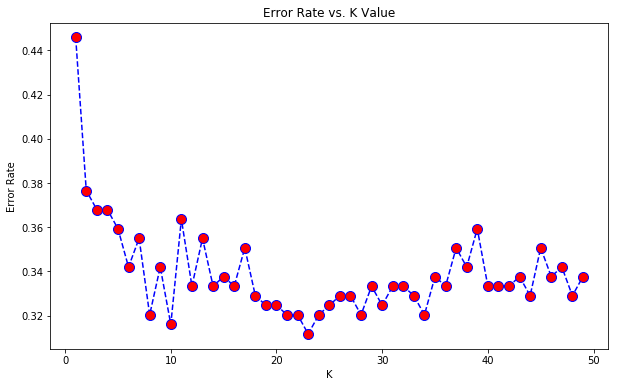

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.32-0.34 Let's retrain the model with that and check the classification report!

In [17]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('Model accuracy when K=1 : ',accuracy_score(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=1


[[100  57]
 [ 46  28]]


Model accuracy when K=1 :  0.5541125541125541


              precision    recall  f1-score   support

           0       0.68      0.64      0.66       157
           1       0.33      0.38      0.35        74

    accuracy                           0.55       231
   macro avg       0.51      0.51      0.51       231
weighted avg       0.57      0.55      0.56       231



In [18]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('Model acuracy when K=23 : ',accuracy_score(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=23


[[125  32]
 [ 40  34]]


Model acuracy when K=23 :  0.6883116883116883


              precision    recall  f1-score   support

           0       0.76      0.80      0.78       157
           1       0.52      0.46      0.49        74

    accuracy                           0.69       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.68      0.69      0.68       231



Finally with optimal value of K=23, model accuracy is increased.